In [1]:
import pandas as pd
import numpy as np
from scipy import stats

from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
# for min_max scaling
from sklearn.preprocessing import MinMaxScaler


In [2]:
data = pd.read_csv('data.csv', delimiter='}', encoding="UTF-16") 
data

,target,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13
0,0.0,0.6,3.848024360038754,-0.12489928599664912,-0.876288,a,0.0,1.0,0.0,-1.4022953844807486,996.8002935258253,2019-07-03,qq,q
1,0.0,-9999.0,3.686711750399645,2.7465579865302554,-16840.562852,fr,0.0,_,0.0,-3.0501812364863525,998.0628287070417,2019-04-12,cc,r
2,1.0,0.6,1.7903405757001267,-0.3791833083216618,1.115662,w,1.0,4.0,inf,inf,997.5618023143123,2019-09-30,aa,t
3,0.0,0.3,2.1368573082176185,1.8436547163343175,-2.593336,w,0.0,1.0,0.0,-0.8521568609928067,998.0647328947183,2019-06-11,dd,u
4,0.0,0.3,3.3008362240888207,1.492122687471352,-3.033777,f,0.0,3.0,0.0,-0.8116829603342575,1000.64857852335,2019-06-18,_,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1.0,0.2,2.7723286859391183,0.3152747929660493,-1.702342,fr,1.0,1.0,0.0,-0.14354151127228287,997.3675673334745,2019-12-07,ee,y
999996,0.0,0.1,inf,inf,-3.269701,a,0.0,3.0,0.0,0.25436082043745145,997.3932479492224,2019-03-22,ww,r
999997,0.0,0.5,inf,inf,-2.049132,f,0.0,1.0,-inf,-inf,999.2696619850115,2019-07-18,qq,o
999998,0.0,0.9,1.0094653348000295,-0.19162749567540516,-1.001801,d,0.0,2.0,1.0,1.6931139459978009,997.5339302673746,2019-10-04,yy,r


In [3]:
#find out if there are any missing values and their possible sum
missing_values_count = data.isna().sum()
missing_values_count 

target    0
c1        0
c2        0
c3        0
c4        0
c5        0
c6        0
c7        0
c8        0
c9        0
c10       0
c11       0
c12       0
c13       0
dtype: int64

In [4]:
data.isnull().sum()

target    0
c1        0
c2        0
c3        0
c4        0
c5        0
c6        0
c7        0
c8        0
c9        0
c10       0
c11       0
c12       0
c13       0
dtype: int64

In [5]:
#get all the info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   target  1000000 non-null  object 
 1   c1      1000000 non-null  float64
 2   c2      1000000 non-null  object 
 3   c3      1000000 non-null  object 
 4   c4      1000000 non-null  float64
 5   c5      1000000 non-null  object 
 6   c6      1000000 non-null  object 
 7   c7      1000000 non-null  object 
 8   c8      1000000 non-null  object 
 9   c9      1000000 non-null  object 
 10  c10     1000000 non-null  object 
 11  c11     1000000 non-null  object 
 12  c12     1000000 non-null  object 
 13  c13     1000000 non-null  object 
dtypes: float64(2), object(12)
memory usage: 106.8+ MB


So there is no obvious NaN values in our dataset, only two columns with fully numerical (float64) data.
Also we can observe non-numerical values such as "inf" or "_" in target and other columns.
We should convert not-fully numerical colums into numerical ones.

<AxesSubplot:>

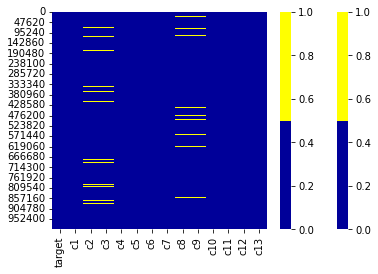

In [6]:
#to find out and visualize what columns contain inf data, we will use data visualization, where yellow indicates inf presence
cols = data.columns[:14] # 14 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow has -inf. blue is other values.
sns.heatmap(data[cols]=='-inf', cmap=sns.color_palette(colours))
sns.heatmap(data[cols]=='inf', cmap=sns.color_palette(colours))

<AxesSubplot:>

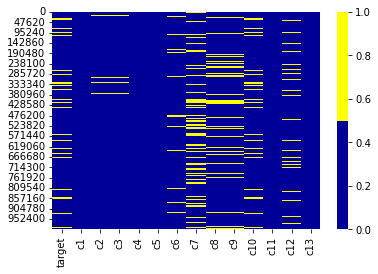

In [7]:
#to find out and visualize "_", where yellow indicates "_" presence
cols = data.columns[:14] # first 14 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow has -inf. blue is other values.
sns.heatmap(data[cols]=='_', cmap=sns.color_palette(colours))

<h3 align='center'>Observing columns data distribution</h3>

In [8]:
#function for making plot for each column
def make_plot(col_name, type='bar'):
    print(data[col_name].value_counts())
    plt.figure(figsize=(10,5))
    data[col_name].value_counts(normalize=True).plot(kind=type)
    plt.ylabel('counts')
    plt.xlabel(col_name)
    plt.plot()
    

<h4 align='center'>Target column</h4>

0.0    700383
1.0    200486
_       99131
Name: target, dtype: int64


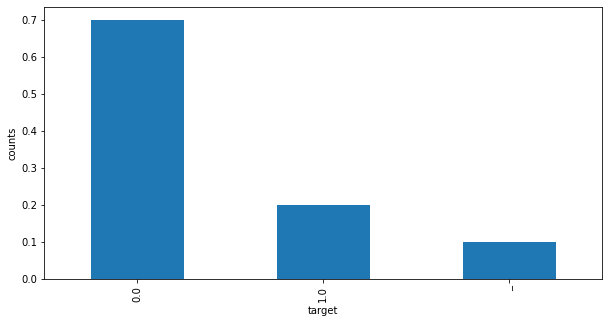

In [9]:
make_plot('target')

As we have missing values in 'target', we should obviously drop these rows

In [10]:
data.drop(data.loc[data['target']=='_'].index, inplace=True)

<h4 align='center'>c1</h4>

 0.3       90560
 0.7       90414
 0.2       90184
 0.8       90157
-9999.0    90075
 0.5       90072
 0.6       90064
 0.4       89965
 0.1       89694
 0.9       89684
Name: c1, dtype: int64


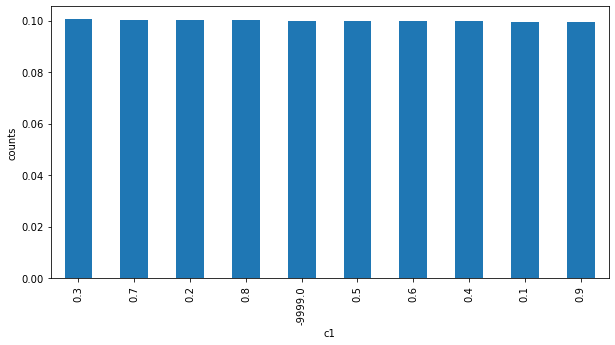

In [11]:
make_plot('c1')

We may observe that -9999.0 is the substitute for missing values. 
So we can 1) check correlation between target and c1 with such missing values 2) without -9999.0

In [12]:
# Pearson's Correlation test function
def pearson_corr(col_name, dataset = data):
    data1 = pd.to_numeric(dataset['target'])
    data2 = dataset[col_name]
    stat, p = pearsonr(data1, data2)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably independent')
    else:
        print('Probably dependent')

In [13]:
# Spearman's Rank Correlation Test function
def spearman_corr(col_name, dataset = data):
	data1 = pd.to_numeric(dataset['target'])
	data2 = dataset[col_name]
	stat, p = spearmanr(data1, data2)
	print('stat=%.3f, p=%.3f' % (stat, p))
	if p > 0.05:
		print('Probably independent')
	else:
		print('Probably dependent')

In [14]:
# Chi-Squared Test function
def chi_corr(col_name, dataset = data):
	table = [pd.to_numeric(dataset['target']), pd.to_numeric(dataset[col_name])]
	stat, p, dof, expected = chi2_contingency(table)
	print('stat=%.3f, p=%.3f' % (stat, p))
	if p > 0.05:
		print('Probably independent')
	else:
		print('Probably dependent')

In [15]:
#without -9999.0
data_c1 = data.drop(data.loc[data['c1']==-9999.0].index)

In [16]:
print("Pearson's Correlation test with missing values")
pearson_corr('c1')
print("Pearson's Correlation test without missing values")
pearson_corr('c1', data_c1)

print("Spearman's Rank Correlation test with missing values")
spearman_corr('c1')
print("Spearman's Rank Correlation without missing values")
spearman_corr('c1', data_c1)

print("Chi-Squared test")
chi_corr('c1', data_c1)

Pearson's Correlation test with missing values
stat=-0.000, p=0.767
Probably independent
Pearson's Correlation test without missing values
stat=-0.001, p=0.602
Probably independent
Spearman's Rank Correlation test with missing values
stat=-0.001, p=0.549
Probably independent
Spearman's Rank Correlation without missing values
stat=-0.001, p=0.602
Probably independent
Chi-Squared test
stat=321341.329, p=1.000
Probably independent


So, we should drop this column from the dataset

<h4 align='center'>c2</h4>

inf                   53705
-inf                  18168
_                     18067
3.848024360038754         1
2.377579712128918         1
                      ...  
1.6017666274767692        1
3.3786542306331118        1
2.746859400102414         1
3.846121594797114         1
1.8487116575771474        1
Name: c2, Length: 810932, dtype: int64


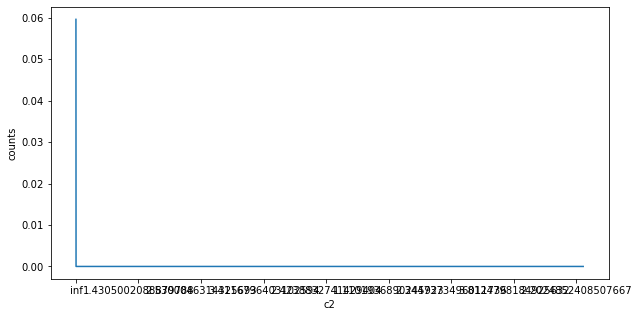

In [17]:
make_plot('c2', 'line')


For conducting statistical test, we should drop missing values from the column

In [18]:
data_c2 = data.drop(data.loc[data['c2']=='_'].index)
inf_filt = (data_c2['c2'] != 'inf') & (data_c2['c2']!='-inf')
data_c2= data_c2.loc[inf_filt]
data_c2['c2'].value_counts()

3.848024360038754     1
3.4962168321079936    1
3.3423928112720644    1
3.3150851132279096    1
1.3226113637249024    1
                     ..
1.6017666274767692    1
3.3786542306331118    1
2.746859400102414     1
3.846121594797114     1
1.8487116575771474    1
Name: c2, Length: 810929, dtype: int64

In [19]:
#normalize c2
(pd.to_numeric(data_c2['c2']) - pd.to_numeric(data_c2['c2'].min())) / (pd.to_numeric(data_c2['c2'].max()) - pd.to_numeric(data_c2['c2'].min()))

0         0.949342
1         0.895571
2         0.263446
3         0.378952
4         0.766946
            ...   
999991    0.513372
999992    0.696945
999995    0.590776
999998    0.003153
999999    0.282903
Name: c2, Length: 810929, dtype: float64

In [20]:
#function for conducting correlation tests
def correl_tests (col_name, dataset=data, num_arr=[]):
    filt_arr = []
    if (np.array_equal(num_arr, filt_arr)):
        num_arr= pd.to_numeric(dataset[col_name])
    data1 = pd.to_numeric(dataset['target'])
    data2 = num_arr
    print("Pearson's Correlation Test")
    stat, p = pearsonr(data1, data2)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably independent')
    else:
        print('Probably dependent')
    print("Spearman's Rank Correlation Test")
    stat, p = spearmanr(data1, data2)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
	    print('Probably independent')
    else:
	    print('Probably dependent')
    print("Kendall’s Rank Correlation Test")   
    stat, p = kendalltau(data1, data2)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
	    print('Probably independent')
    else:
	    print('Probably dependent')

In [21]:
correl_tests('c2', data_c2)

Pearson's Correlation Test
stat=0.001, p=0.568
Probably independent
Spearman's Rank Correlation Test
stat=0.001, p=0.569
Probably independent
Kendall’s Rank Correlation Test
stat=0.001, p=0.569
Probably independent


In [22]:
chi_corr('c2', data_c2)

stat=537556.080, p=1.000
Probably independent


So, we should drop this column from the dataset

<h4 align='center'>c3</h4>

inf                     53705
-inf                    18168
_                       18067
-0.12489928599664912        1
2.1269779692610187          1
                        ...  
-2.9393222516006237         1
1.7188109618191807          1
1.2192488127677694          1
0.4330490423852811          1
-0.3196058449170467         1
Name: c3, Length: 810932, dtype: int64


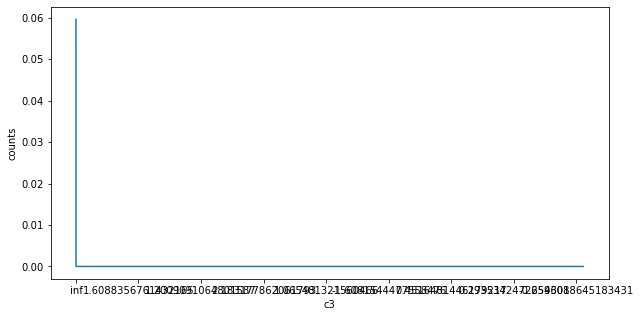

In [23]:
make_plot('c3', 'line')

In [24]:
data_c3 = data.drop(data.loc[data['c3']=='_'].index)
inf_filt = (data_c3['c3'] != 'inf') & (data_c3['c3']!='-inf')
data_c3= data_c3.loc[inf_filt]
data_c3['c3'].value_counts()

-0.12489928599664912    1
0.2859699481058606      1
1.9172070176576632      1
1.3596228421196344      1
-0.24973878869414046    1
                       ..
-2.9393222516006237     1
1.7188109618191807      1
1.2192488127677694      1
0.4330490423852811      1
-0.3196058449170467     1
Name: c3, Length: 810929, dtype: int64

In [25]:
#scaling data in c3 column
scaler = MinMaxScaler(feature_range=(0,1))
arr= pd.to_numeric(data_c3['c3'])
arr = arr.to_numpy()
arr = arr.reshape(-1,1)
scaled = scaler.fit_transform(arr)
scaled

array([[0.35958402],
       [0.71958869],
       [0.32770354],
       ...,
       [0.41477019],
       [0.35121807],
       [0.33517298]])

In [26]:
#convert scaled array to 1d array and add new column
scaled = scaled.flatten()
se = pd.Series(scaled)
data_c3['c3_new'] = se.values

In [27]:
correl_tests('c3_new', data_c3)

Pearson's Correlation Test
stat=-0.000, p=0.664
Probably independent
Spearman's Rank Correlation Test
stat=-0.001, p=0.474
Probably independent
Kendall’s Rank Correlation Test
stat=-0.001, p=0.474
Probably independent


We can also do not drop -inf and inf but change it to -9999.0 and 9999.0 values

In [28]:
data_c3_r = data.drop(data.loc[data['c3']=='_'].index)
data_c3_r['c3'].replace({"-inf": -9999.0, "inf": 9999.0}, inplace=True)

In [29]:
correl_tests('c3', data_c3_r)

Pearson's Correlation Test
stat=-0.000, p=0.880
Probably independent
Spearman's Rank Correlation Test
stat=-0.001, p=0.482
Probably independent
Kendall’s Rank Correlation Test
stat=-0.001, p=0.482
Probably independent


C:\Users\Maria Anatoliivna\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


In [30]:
#scaling data in c3 column
scaler = MinMaxScaler(feature_range=(0,1))
arr= pd.to_numeric(data_c3_r['c3'])
arr = arr.to_numpy()
arr = arr.reshape(-1,1)
scaled = scaler.fit_transform(arr)
scaled

array([[0.49999375],
       [0.50013734],
       [0.49998104],
       ...,
       [1.        ],
       [0.49999042],
       [0.49998402]])

In [31]:
scaled = scaled.flatten()
se = pd.Series(scaled)
data_c3_r['c3_new'] = se.values

In [32]:
correl_tests('c3_new', data_c3_r)

Pearson's Correlation Test
stat=-0.000, p=0.880
Probably independent
Spearman's Rank Correlation Test
stat=-0.001, p=0.482
Probably independent
Kendall’s Rank Correlation Test
stat=-0.001, p=0.482
Probably independent


C:\Users\Maria Anatoliivna\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


So, we should drop this column from the dataset

<h4 align='center'>c4</h4>

-0.876288    1
 0.692955    1
 1.017884    1
-2.623874    1
-4.183971    1
            ..
-0.734159    1
-0.506208    1
 1.873705    1
-1.072168    1
-0.003627    1
Name: c4, Length: 900869, dtype: int64


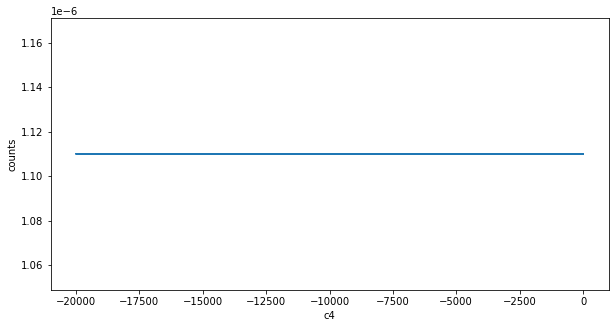

In [33]:
make_plot('c4','line')

<p>Column c4 has only unique values</p>


In [34]:
correl_tests('c4',data)

Pearson's Correlation Test
stat=-0.000, p=0.706
Probably independent
Spearman's Rank Correlation Test
stat=0.000, p=0.997
Probably independent
Kendall’s Rank Correlation Test
stat=0.000, p=0.997
Probably independent


In [35]:
#scaling data in c4 column
data_c4 = data.copy()
scaler = MinMaxScaler(feature_range=(0,1))
arr= pd.to_numeric(data_c4['c4'])
arr = arr.to_numpy()
arr = arr.reshape(-1,1)
scaled = scaler.fit_transform(arr)
scaled

array([[0.99967491],
       [0.15810445],
       [0.99977446],
       ...,
       [0.9996163 ],
       [0.99966864],
       [0.99971852]])

In [36]:
#convert scaled array to 1d array and add new column
scaled = scaled.flatten()
se = pd.Series(scaled)
data_c4['c4_new'] = se.values

In [37]:
correl_tests('c4_new', data_c4)

Pearson's Correlation Test
stat=-0.000, p=0.706
Probably independent
Spearman's Rank Correlation Test
stat=0.000, p=0.997
Probably independent
Kendall’s Rank Correlation Test
stat=0.000, p=0.997
Probably independent


<h4 align='center'>c5</h4>

f     113128
w     112872
fr    112677
d     112637
a     112527
qw    112512
ew    112511
sd    112005
Name: c5, dtype: int64


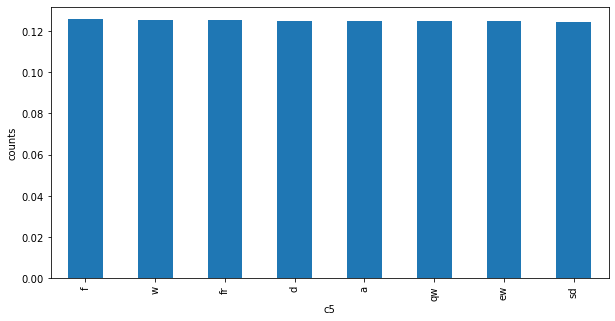

In [38]:
make_plot('c5')

In [39]:
#convert str data into numerical
lst = pd.factorize(data['c5'])[0]
arr = np.array(lst)
arr

array([0, 1, 2, ..., 3, 7, 0], dtype=int64)

In [40]:
#normalize array data
norm = np.linalg.norm(arr)
normal_array = arr/norm

In [41]:
correl_tests('c5', data, normal_array)

Pearson's Correlation Test
stat=-0.000, p=0.954
Probably independent
Spearman's Rank Correlation Test
stat=-0.000, p=0.954
Probably independent
Kendall’s Rank Correlation Test
stat=-0.000, p=0.954
Probably independent


C:\Users\Maria Anatoliivna\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


<h4 align='center'>c6</h4>

0.0    530414
1.0    290444
_       80011
Name: c6, dtype: int64


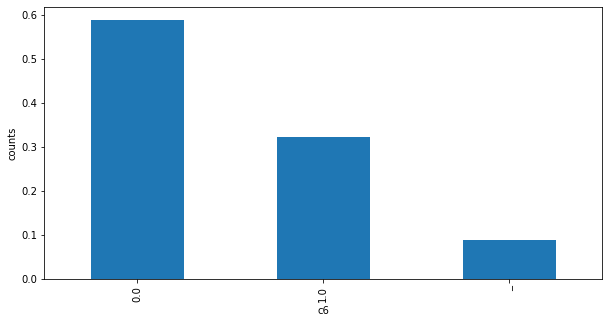

In [42]:
make_plot('c6')

In [43]:
data_c6 = data.drop(data.loc[data['c6']=='_'].index)


In [44]:
correl_tests('c6',data_c6)

Pearson's Correlation Test
stat=0.502, p=0.000
Probably dependent
Spearman's Rank Correlation Test
stat=0.502, p=0.000
Probably dependent
Kendall’s Rank Correlation Test
stat=0.502, p=0.000
Probably dependent


C:\Users\Maria Anatoliivna\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


<h4 align='center'>c7</h4>

4.0    219997
1.0    200601
_      200260
3.0    140451
2.0    139560
Name: c7, dtype: int64


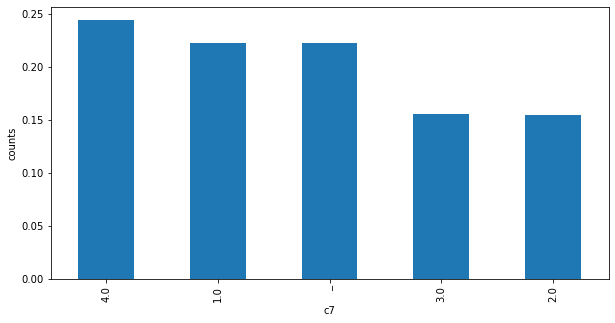

In [45]:
make_plot('c7')

In [46]:
data_c7 = data.drop(data.loc[data['c7']=='_'].index)


In [47]:
correl_tests('c7',data_c7)

Pearson's Correlation Test
stat=0.069, p=0.000
Probably dependent
Spearman's Rank Correlation Test
stat=0.075, p=0.000
Probably dependent
Kendall’s Rank Correlation Test
stat=0.069, p=0.000
Probably dependent


C:\Users\Maria Anatoliivna\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


In [48]:
data_c7_r = data.copy()
data_c7_r['c7'].replace({"_": 9999.0}, inplace=True)
#scaling data in c7 column
scaler = MinMaxScaler(feature_range=(0,1))
arr= pd.to_numeric(data_c7_r['c7'])
arr = arr.to_numpy()
arr = arr.reshape(-1,1)
scaled = scaler.fit_transform(arr)
scaled = scaled.flatten()
se = pd.Series(scaled)
data_c7_r['c7_new'] = se.values

In [49]:
correl_tests('c7_new',data_c7_r)

Pearson's Correlation Test
stat=0.100, p=0.000
Probably dependent
Spearman's Rank Correlation Test
stat=0.116, p=0.000
Probably dependent
Kendall’s Rank Correlation Test
stat=0.104, p=0.000
Probably dependent


C:\Users\Maria Anatoliivna\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


<h4 align='center'>c8</h4>

0.0     410271
1.0     210522
-1.0     99912
_        90217
-inf     69785
inf      20162
Name: c8, dtype: int64


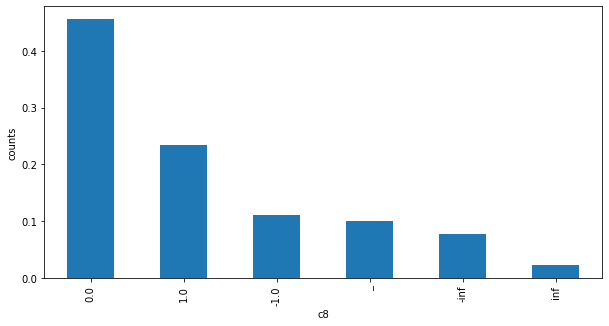

In [50]:
make_plot('c8')

In [51]:
data_c8 = data.drop(data.loc[data['c8']=='_'].index)
inf_filt = (data_c8['c8'] != 'inf') & (data_c8['c8']!='-inf')
data_c8= data_c8.loc[inf_filt]
data_c8['c8'].value_counts()

0.0     410271
1.0     210522
-1.0     99912
Name: c8, dtype: int64

In [52]:
correl_tests('c8', data_c8)

Pearson's Correlation Test
stat=-0.651, p=0.000
Probably dependent
Spearman's Rank Correlation Test
stat=-0.621, p=0.000
Probably dependent
Kendall’s Rank Correlation Test
stat=-0.595, p=0.000
Probably dependent


C:\Users\Maria Anatoliivna\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


In [53]:
col_mean = pd.to_numeric(data_c8['c8']).mean()
col_mean
data_c8_r = data.copy()
data_c8_r['c8'].replace({"-inf": -9999.0, "inf": 9999.0, "_": col_mean}, inplace=True)
data_c8_r['c8'].value_counts()

0.0                    410271
1.0                    210522
-1.0                    99912
0.15347472266738818     90217
-9999.0                 69785
9999.0                  20162
Name: c8, dtype: int64

In [54]:
correl_tests('c8', data_c8_r)

Pearson's Correlation Test
stat=0.268, p=0.000
Probably dependent
Spearman's Rank Correlation Test
stat=-0.274, p=0.000
Probably dependent
Kendall’s Rank Correlation Test
stat=-0.251, p=0.000
Probably dependent


<h4 align='center'>c9</h4>

_                      90217
-inf                   69785
inf                    20162
-1.4022953844807486        1
-2.611484478944758         1
                       ...  
-0.2196693847000153        1
0.7553389739328342         1
-4.067226508015141         1
-0.98355215475623          1
-1.8913900139639952        1
Name: c9, Length: 720708, dtype: int64


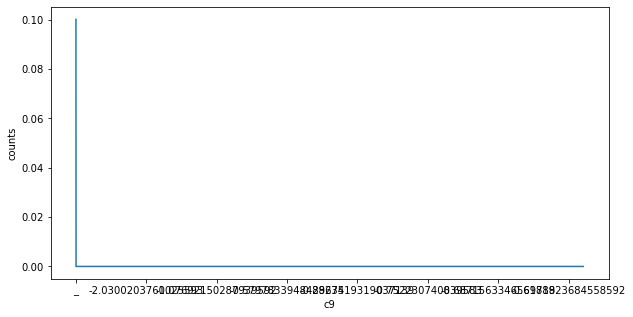

In [55]:
make_plot('c9', 'line')

In [56]:
data_c9 = data.drop(data.loc[data['c9']=='_'].index)
inf_filt = (data_c9['c9'] != 'inf') & (data_c9['c9']!='-inf')
data_c9= data_c9.loc[inf_filt]
data_c9['c9'].value_counts()

-1.4022953844807486     1
-2.611484478944758      1
-2.8438437046765377     1
1.0874307557873788      1
-0.21610818998772663    1
                       ..
-0.2196693847000153     1
0.7553389739328342      1
-4.067226508015141      1
-0.98355215475623       1
-1.8913900139639952     1
Name: c9, Length: 720705, dtype: int64

In [57]:
correl_tests('c9', data_c9)

Pearson's Correlation Test
stat=-0.289, p=0.000
Probably dependent
Spearman's Rank Correlation Test
stat=-0.272, p=0.000
Probably dependent
Kendall’s Rank Correlation Test
stat=-0.222, p=0.000
Probably dependent


In [58]:
#scaling data in c9 column
scaler = MinMaxScaler(feature_range=(0,1))
arr= pd.to_numeric(data_c9['c9'])
arr = arr.to_numpy()
arr = arr.reshape(-1,1)
scaled = scaler.fit_transform(arr)
scaled

array([[0.44937109],
       [0.24267668],
       [0.518375  ],
       ...,
       [0.65716557],
       [0.83762845],
       [0.38802392]])

In [59]:
#convert scaled array to 1d array and add new column
scaled = scaled.flatten()
se = pd.Series(scaled)
data_c9['c9_new'] = se.values

In [60]:
correl_tests('c9_new', data_c9)

Pearson's Correlation Test
stat=-0.289, p=0.000
Probably dependent
Spearman's Rank Correlation Test
stat=-0.272, p=0.000
Probably dependent
Kendall’s Rank Correlation Test
stat=-0.222, p=0.000
Probably dependent


In [61]:
data_c9_r = data.copy()
col_mean = pd.to_numeric(data_c9['c9']).mean()
data_c9_r['c9'].replace({"_": col_mean, "inf": 9999.0, "-inf": -9999.0}, inplace=True)
correl_tests('c9', data_c9_r)
data_c9_r['c9'].value_counts()

Pearson's Correlation Test
stat=0.268, p=0.000
Probably dependent
Spearman's Rank Correlation Test
stat=-0.066, p=0.000
Probably dependent
Kendall’s Rank Correlation Test


C:\Users\Maria Anatoliivna\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


stat=-0.054, p=0.000
Probably dependent


-0.8469089109433051    90217
-9999.0                69785
9999.0                 20162
-1.4022953844807486        1
-2.611484478944758         1
                       ...  
-0.2196693847000153        1
0.7553389739328342         1
-4.067226508015141         1
-0.98355215475623          1
-1.8913900139639952        1
Name: c9, Length: 720708, dtype: int64

<h4 align='center'>c10</h4>

996.8002935258253     1
999.893508333398      1
995.6928385739434     1
1000.6259995023979    1
1000.2294345207205    1
                     ..
997.0389832404381     1
998.7878049085126     1
996.980482706664      1
997.093209727735      1
999.6925599702948     1
Name: c10, Length: 900869, dtype: int64


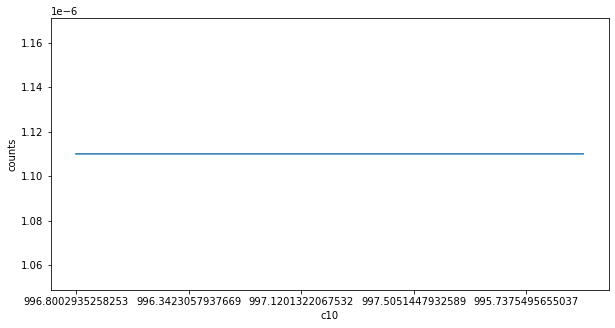

In [62]:
make_plot('c10', 'line')


In [63]:
correl_tests('c10',data)

Pearson's Correlation Test
stat=0.307, p=0.000
Probably dependent
Spearman's Rank Correlation Test
stat=0.288, p=0.000
Probably dependent
Kendall’s Rank Correlation Test
stat=0.235, p=0.000
Probably dependent


In [64]:
#scaling data in c10 column
data_c10 = data.copy()
scaler = MinMaxScaler(feature_range=(0,1))
arr= pd.to_numeric(data_c10['c10'])
arr = arr.to_numpy()
arr = arr.reshape(-1,1)
scaled = scaler.fit_transform(arr)
#convert scaled array to 1d array and add new column
scaled = scaled.flatten()
se = pd.Series(scaled)
data_c10['10'] = se.values


In [65]:
correl_tests('c10',data_c10)

Pearson's Correlation Test
stat=0.307, p=0.000
Probably dependent
Spearman's Rank Correlation Test
stat=0.288, p=0.000
Probably dependent
Kendall’s Rank Correlation Test
stat=0.235, p=0.000
Probably dependent


<h4 align='center'>c11</h4>

2019-08-03    3348
2019-09-15    3314
2019-03-18    3306
2019-06-16    3287
2019-12-29    3281
              ... 
2019-08-09    1824
2019-07-10    1818
2019-12-31    1817
2019-08-06    1812
2019-11-26    1812
Name: c11, Length: 367, dtype: int64


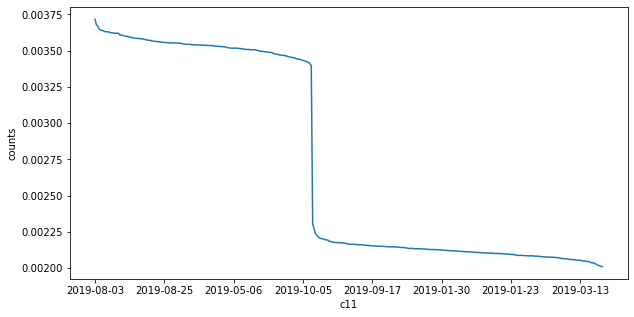

In [66]:
make_plot('c11', 'line')

In [67]:
data_c11 = data.drop(data.loc[data['c11']=='_'].index)
print(data_c11.shape)
data_c11['c11'] = pd.to_datetime(data_c11['c11'])
data_c11_1 = data_c11.set_index('c11')
data_c11_1=data['c11'].index.values.astype(float)
data_c11_1

(897773, 14)


array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 9.99997e+05,
       9.99998e+05, 9.99999e+05])

In [84]:
scaler = MinMaxScaler(feature_range=(0,1))
arr = data_c11_1.reshape(-1,1)
scaled = scaler.fit_transform(arr)
scaled = scaled.flatten()
se = pd.Series(scaled)
data_c11_new = data.copy()
print(data_c11.shape)
data_c11_new['c11_new'] = se.values
data_c11_new['c11_new'].value_counts()


(897773, 14)


0.000000    1
0.666405    1
0.666393    1
0.666394    1
0.666395    1
           ..
0.333174    1
0.333176    1
0.333177    1
0.333179    1
1.000000    1
Name: c11_new, Length: 900869, dtype: int64

In [85]:
correl_tests('c11_new',data_c11_new)

Pearson's Correlation Test
stat=0.001, p=0.537
Probably independent
Spearman's Rank Correlation Test
stat=0.001, p=0.537
Probably independent
Kendall’s Rank Correlation Test
stat=0.001, p=0.537
Probably independent


<h4 align='center'>c12</h4>

dd     124115
yy     106141
aa     106022
ee     105928
_      105686
qq     105664
ww     105339
cc     105219
rr      18520
tty     18235
Name: c12, dtype: int64


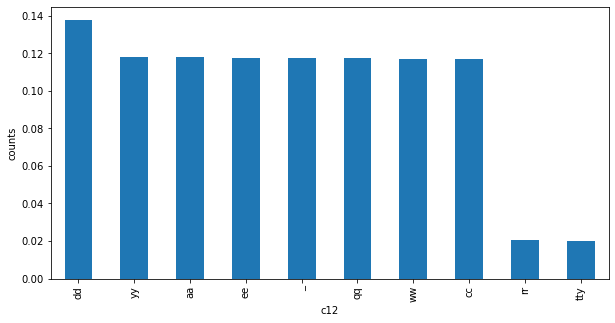

In [69]:
make_plot('c12')

In [70]:
data_c12 = data.drop(data.loc[data['c12']=='_'].index)
data_c12['c12'].value_counts()

dd     124115
yy     106141
aa     106022
ee     105928
qq     105664
ww     105339
cc     105219
rr      18520
tty     18235
Name: c12, dtype: int64

In [71]:
#convert str data into numerical
lst = pd.factorize(data_c12['c12'])[0]
arr = np.array(lst)
arr

array([0, 1, 2, ..., 4, 0, 6], dtype=int64)

In [72]:
#normalize array data
norm = np.linalg.norm(arr)
normal_array = arr/norm

In [73]:
#execute correlation tests
correl_tests('c12', data_c12, normal_array)


Pearson's Correlation Test
stat=0.178, p=0.000
Probably dependent
Spearman's Rank Correlation Test
stat=0.149, p=0.000
Probably dependent
Kendall’s Rank Correlation Test
stat=0.129, p=0.000
Probably dependent


C:\Users\Maria Anatoliivna\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


In [74]:
#new normalized numerical column from c12
data_c12_r = data.copy()
lst = pd.factorize(data_c12_r['c12'])[0]
arr = np.array(lst)
norm = np.linalg.norm(arr)
normal_array = arr/norm
normal_array
data_c12_r['c12'] = pd.DataFrame(normal_array, columns = ['c12'])
data_c12_r['c12'].value_counts()

0.000714    111993
0.001666     95622
0.001428     95439
0.000476     95434
0.000952     95229
0.000000     95110
0.001190     94948
0.000238     94783
0.001904     16681
0.002142     16469
Name: c12, dtype: int64

In [75]:
data_c12_r['c12'].isna().sum()

89161

<h4 align='center'>c13</h4>

y    90490
r    90327
u    90138
e    90133
i    90102
w    90094
t    90014
p    89996
o    89858
q    89717
Name: c13, dtype: int64


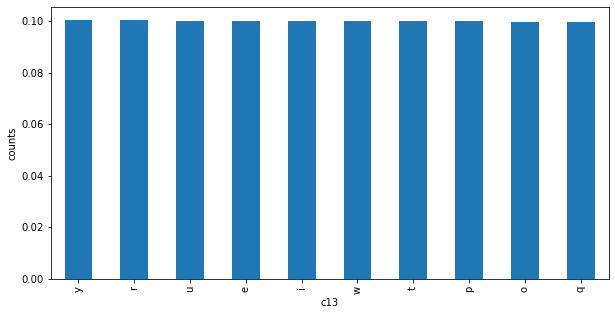

In [76]:
make_plot('c13')

In [77]:
#convert str data into numerical
lst = pd.factorize(data['c13'])[0]
arr = np.array(lst)
arr

array([0, 1, 2, ..., 8, 1, 3], dtype=int64)

In [78]:
#normalize array data
norm = np.linalg.norm(arr)
normal_array = arr/norm

In [79]:
correl_tests('c13', data, normal_array)

Pearson's Correlation Test
stat=-0.002, p=0.040
Probably dependent
Spearman's Rank Correlation Test
stat=-0.002, p=0.040
Probably dependent
Kendall’s Rank Correlation Test
stat=-0.002, p=0.040
Probably dependent


C:\Users\Maria Anatoliivna\anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


In [80]:
#new normalized numerical column from c13
data_c13_r = data.copy()
lst = pd.factorize(data_c13_r['c13'])[0]
arr = np.array(lst)
norm = np.linalg.norm(arr)
normal_array = arr/norm
normal_array
data_c13_r['c13'] = pd.DataFrame(normal_array, columns = ['c13'])


<h1 align='center'>Conclusion</h1>
<p>
   <table align='center'>
   <tr>
    <th>Column name</th>
    <th>Action</th>
  </tr>
  <tr>
    <td>target</td>
    <td>drop missing values</td>
  </tr>
  <tr>
    <td>c1</td>
    <td>drop column</td>
  </tr>
  <tr>
    <td>c2</td>
    <td>drop column</td>
  </tr>
    <tr>
    <td>c3</td>
    <td>drop column</td>
  </tr>
  <tr>
    <td>c4</td>
    <td>leave column</td>
  </tr>
  <tr>
    <td>c5</td>
    <td>drop column</td>
  </tr>
  <tr>
    <td>c6</td>
    <td>leave the column</td>
  </tr>
  <tr>
    <td>c7</td>
    <td>leave the column</td>
  </tr>
  <tr>
    <td>c8</td>
    <td>leave the column</td>
  </tr>
  <tr>
    <td>c9</td>
    <td>leave the column</td>
  </tr>
  <tr>
    <td>c10</td>
    <td>leave the column</td>
  </tr>
  <tr>
    <td>c11</td>
    <td>drop column</td>
  </tr>
    <tr>
    <td>c12</td>
    <td>replace text data column with the numerical</td>
  </tr>
  <tr>
    <td>c13</td>
    <td>replace text data column with the numerical</td>
  </tr>
   </table>


</p>

<h2 align='center'> Modified dataset</h2>

In [81]:
#function for dropping columns
def drop_col(col_name):
    data.drop(col_name, axis=1, inplace=True)

In [82]:

cols = ('c1', 'c2', 'c3', 'c5', 'c11',)
for c in cols:
    drop_col(c)

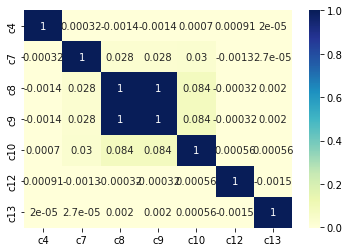

In [83]:
data['c4'] = data_c4['c4_new'].copy()
data['c6'].replace({"_": 9999.0}, inplace=True)
data['c7'] = data_c7_r['c7_new'].copy()
data['c8'] = data_c8_r['c8'].astype(float).copy()
data['c9']= data_c9_r['c9'].astype(float).copy()
data['c10'] = data_c10['10'].astype(float).copy()
data['c12']= data_c12_r['c12'].copy()
data['c13']= data_c13_r['c13'].copy()

dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()